In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import regex
import time
from tqdm import tqdm



1.Containerized MPI application running on HPC Cluster Prometheus

A.) time, speedup, efficiency plots


In [2]:
# Dla każdego rozmiaru klastra wykonano 3 pomiary i policzono średnią oraz odchylenie standardowe
x =26*676
df = pd.DataFrame(data={
      'strong1': [x,676.026590,338.187417,169.119511,84.483489], 
      'strong2': [x,676.141240,338.308683,169.590798,84.504299],
      'strong3': [x,675.194583,338.238122,168.968689,84.533727],
})



df.index+=1
df

df = df.set_index(pd.Series([1,24,48,96,192]))

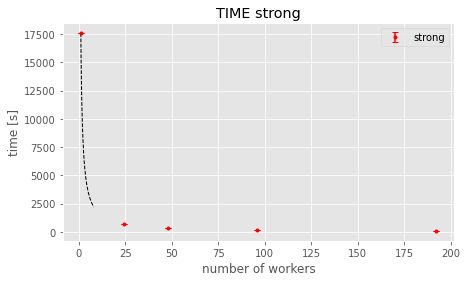

In [3]:
def line(formula):  
    x = np.linspace(1,8,100) # 100 linearly spaced numbers
    y = list(map(formula,x))
    plt.plot(x, y, '--', lw=1,color='black')

fig = plt.figure(figsize=(7,4))

i =0
name ='strong'
df2 = df.filter(regex='strong')
plt.errorbar(df.index, df2.mean(axis=1), df2.std(axis=1),c='r', label=name,linestyle='None',marker='.',capsize=3)

# print ideal curve
sequential = np.mean(df2.iloc[0]) 
line(lambda x:1/x*sequential)

    
plt.legend(loc='upper right');
plt.xlabel("number of workers")
plt.ylabel("time [s]")
plt.title(f"TIME strong")
plt.show()



Text(0.5, 1.0, 'Speed strong')

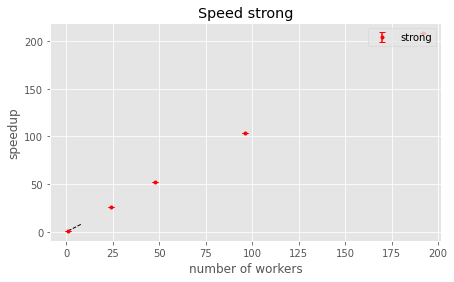

In [4]:
fig = plt.figure(figsize=(7,4))

speedup_strong = []
df2 = df.filter(regex='strong')
sequential = df2.iloc[0]
speedup = sequential /df2
speedup_strong.append(speedup.copy())
plt.errorbar(df.index, speedup.mean(axis=1), speedup.std(axis=1),c='r', label=name,linestyle='None',marker='.',capsize=3)
    
    
line(lambda x:x)
    
plt.legend(loc='upper right');
plt.xlabel("number of workers")
plt.ylabel("speedup")
plt.title(f"Speed strong")


Text(0.5, 1.0, 'Efficiency strong')

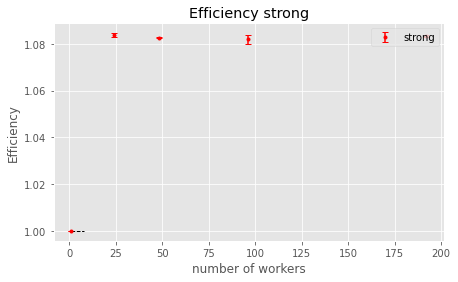

In [5]:


plt.figure(figsize=(7,4))

name ='strong'
efficiency = speedup_strong[0].div(df.index,axis =0)

plt.errorbar(df.index, efficiency.mean(axis=1), efficiency.std(axis=1),c='r', label=name,linestyle='None',marker='.',capsize=3)

line(lambda x:1)
    
plt.legend(loc='upper right');
plt.xlabel("number of workers")
plt.ylabel("Efficiency")
plt.title(f"Efficiency strong")

